In [1]:
import os
import shutil

In [2]:
consonants_src = '/kaggle/input/devanagari-character-dataset/nhcd/nhcd/consonants'
numerals_src = '/kaggle/input/devanagari-character-dataset/nhcd/nhcd/numerals'
vowels_src = '/kaggle/input/devanagari-character-dataset/nhcd/nhcd/vowels'
compound_src_train = '/kaggle/input/self-compounded-devanagari-characters/self_compounded_devanagari_chars/data/train'
compound_src_valid = '/kaggle/input/self-compounded-devanagari-characters/self_compounded_devanagari_chars/data/validation'
data_path = '/kaggle/working/data'

In [3]:
if os.path.exists(data_path):
    shutil.rmtree(data_path)
os.mkdir(data_path)


# copy numerals
for srcroot, srcdirs, srcfiles in os.walk(numerals_src):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'n_{srcdirname}') 
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))

# copy vowels
for srcroot, srcdirs, srcfiles in os.walk(vowels_src):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'v_{srcdirname}') 
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))

# copy consonants
for srcroot, srcdirs, srcfiles in os.walk(consonants_src):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'c_{srcdirname}') 
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))

# copy compound training examples
for srcroot, srcdirs, srcfiles in os.walk(compound_src_train):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'j_{srcdirname}') 
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))

# copy compound validation examples
for srcroot, srcdirs, srcfiles in os.walk(compound_src_valid):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'j_{srcdirname}') 
        #os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))

print('Done')

Done


In [4]:
i=0
for srcroot, srcdirs, srcfiles in os.walk('/kaggle/working/data/n_4'):
    for filename in srcfiles:
        i+=1
        print(filename)
print(f'{i} files')

021_10.jpg
036_01.jpg
010_10.jpg
030_04.jpg
007_05.jpg
001_19.jpg
021_02.jpg
006_03.jpg
029_01.jpg
002_14.jpg
013_09.jpg
012_03.jpg
006_02.jpg
016_04.jpg
006_08.jpg
010_02.jpg
023_01.jpg
005_10.jpg
019_05.jpg
011_04.jpg
008_09.jpg
013_04.jpg
021_05.jpg
020_10.jpg
007_09.jpg
040_02.jpg
021_03.jpg
010_03.jpg
025_06.jpg
016_07.jpg
019_10.jpg
021_07.jpg
013_08.jpg
043_01.jpg
014_06.jpg
015_04.jpg
012_04.jpg
042_02.jpg
030_01.jpg
001_24.jpg
001_04.jpg
028_05.jpg
007_08.jpg
016_02.jpg
008_10.jpg
010_09.jpg
001_16.jpg
046_01.jpg
008_04.jpg
005_13.jpg
007_10.jpg
001_07.jpg
028_01.jpg
037_01.jpg
019_07.jpg
044_02.jpg
005_11.jpg
025_04.jpg
011_01.jpg
018_07.jpg
017_06.jpg
025_05.jpg
007_06.jpg
039_05.jpg
014_05.jpg
039_03.jpg
012_14.jpg
010_08.jpg
010_06.jpg
027_02.jpg
007_01.jpg
041_02.jpg
001_02.jpg
019_06.jpg
018_09.jpg
012_16.jpg
014_07.jpg
014_02.jpg
017_10.jpg
001_14.jpg
012_15.jpg
035_02.jpg
016_01.jpg
004_01.jpg
008_01.jpg
002_15.jpg
024_02.jpg
021_06.jpg
004_10.jpg
012_02.jpg
013_03.jpg

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_img_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_img_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [7]:
train_img_path = "/kaggle/working/data"
num_classes = 77

In [8]:
batch_size = 8
train_gen = train_img_datagen.flow_from_directory(
    directory=train_img_path,
    target_size=(28, 28),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_gen = train_img_datagen.flow_from_directory(
    directory=train_img_path,
    target_size=(28, 28),
    color_mode="grayscale",
    class_mode="categorical",
    subset='validation',
    shuffle=False,
    seed=42
)

Found 13682 images belonging to 77 classes.
Found 3410 images belonging to 77 classes.


In [9]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import plot_model
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
def create_model():
    
    model = Sequential(
        [
            Input(shape=(28, 28, 1)),
            Conv2D(32, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            Conv2D(32, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            Conv2D(64, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dropout(0.5),
            Dense(num_classes, activation="softmax"),
        ]
    )
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

    return model

In [11]:
model = create_model()
model_json = model.to_json()
with open("/kaggle/working/model.json", "w") as json_file:
    json_file.write(model_json)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 64)        2

2022-08-04 04:09:35.018722: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


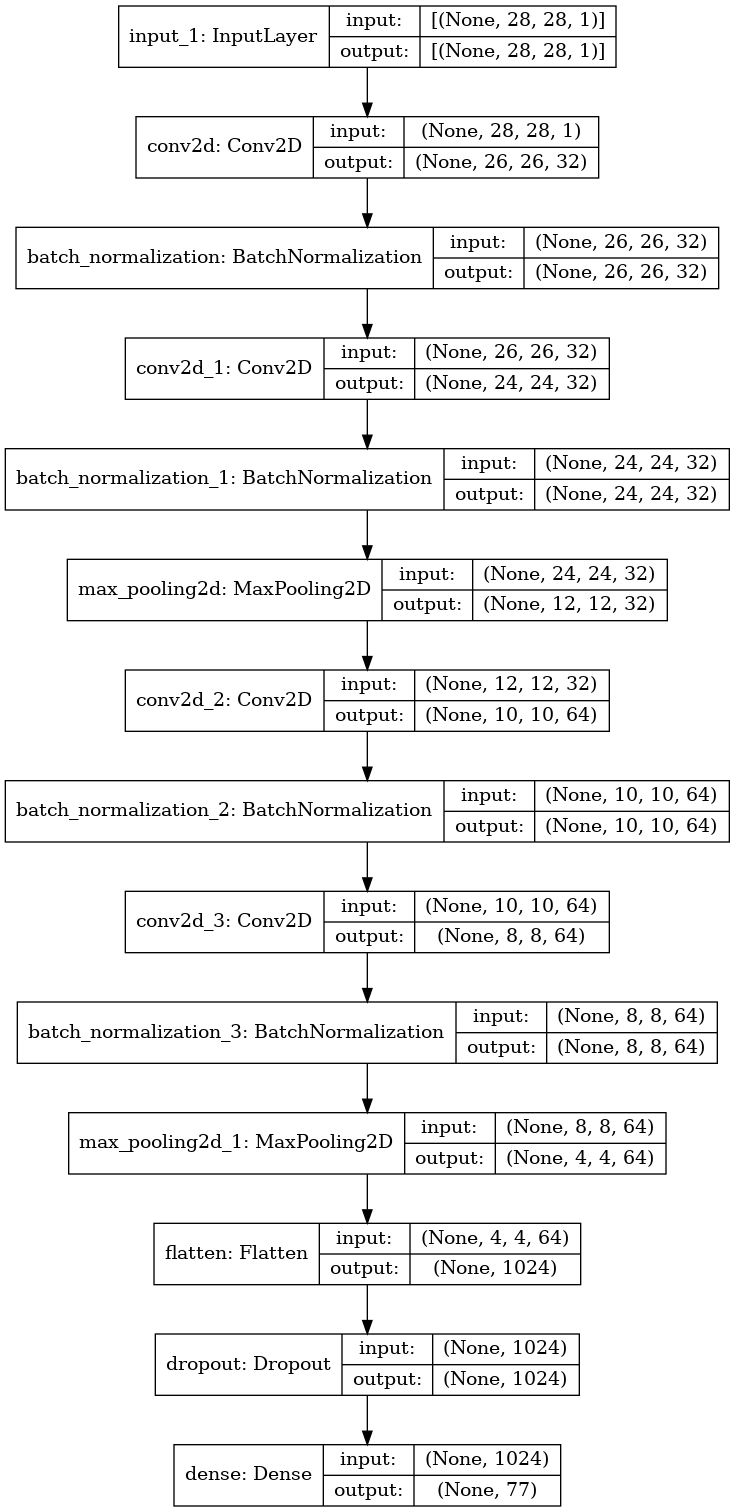

In [12]:
plot_model(model, to_file='/kaggle/working/model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn import metrics
import numpy as np

In [14]:
# checkpoint
model_file="/kaggle/working/best_model.hdf5"
bm = ModelCheckpoint(model_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_accuracy', patience=20)
callbacks_list = [bm, es]


history = model.fit(train_gen,
            validation_data = valid_gen,
            steps_per_epoch = train_gen.n//train_gen.batch_size,
            validation_steps = valid_gen.n//valid_gen.batch_size,
            epochs=1000,
            callbacks=callbacks_list)

print('Training stopped')

2022-08-04 04:09:36.054649: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
1710/1710 [==============================] - 33s 18ms/step - loss: 3.3155 - accuracy: 0.2497 - val_loss: 1.9265 - val_accuracy: 0.4499

Epoch 00001: val_accuracy improved from -inf to 0.44988, saving model to /kaggle/working/best_model.hdf5
Epoch 2/1000
1710/1710 [==============================] - 32s 19ms/step - loss: 1.8452 - accuracy: 0.4750 - val_loss: 1.2911 - val_accuracy: 0.6244

Epoch 00002: val_accuracy improved from 0.44988 to 0.62441, saving model to /kaggle/working/best_model.hdf5
Epoch 3/1000
1710/1710 [==============================] - 32s 19ms/step - loss: 1.4401 - accuracy: 0.5807 - val_loss: 1.1114 - val_accuracy: 0.6701

Epoch 00003: val_accuracy improved from 0.62441 to 0.67011, saving model to /kaggle/working/best_model.hdf5
Epoch 4/1000
1710/1710 [==============================] - 32s 19ms/step - loss: 1.2163 - accuracy: 0.6378 - val_loss: 0.8529 - val_accuracy: 0.7385

Epoch 00004: val_accuracy improved from 0.67011 to 0.73850, saving model to /kaggle

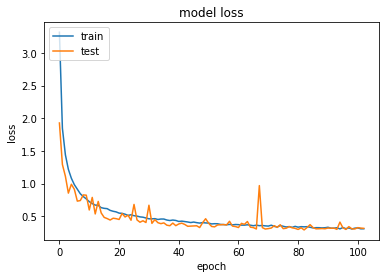

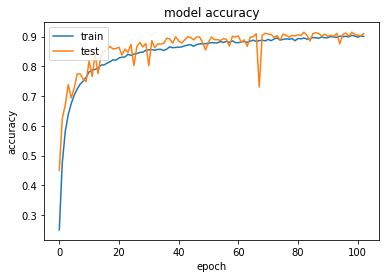

In [15]:
# plot loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# load best model
json_file = open('/kaggle/working/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
best_model = model_from_json(loaded_model_json)
# load weights into new model
best_model.load_weights("/kaggle/working/best_model.hdf5")
best_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
print("Loaded model from disk")

Loaded model from disk


In [17]:
score = best_model.evaluate(valid_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

107/107 [==============================] - 3s 28ms/step - loss: 0.2930 - accuracy: 0.9135
Test loss: 0.2930264472961426
Test accuracy: 0.9134897589683533


In [18]:
predict=best_model.predict(valid_gen)
# predict the class label
y_predicted = predict.argmax(axis=-1)

In [19]:
y_actual = valid_gen.labels

In [20]:
confusion_matrix = metrics.confusion_matrix(y_actual, y_predicted)

In [21]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

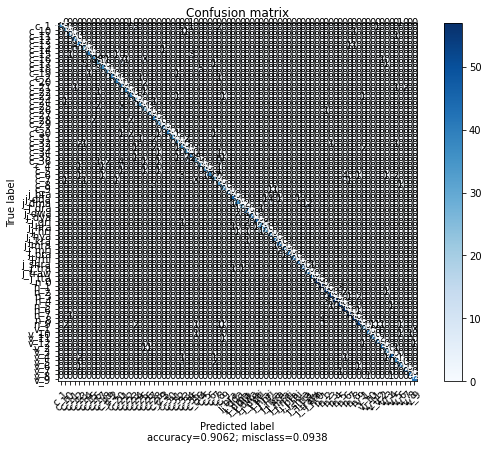

In [22]:
cls_lbl = []

for item in valid_gen.class_indices.items():
    cls_lbl.append(item[0])


plot_confusion_matrix(confusion_matrix,
                          target_names=cls_lbl,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

In [23]:
print(metrics.classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.89      0.78      0.83        41
           2       0.95      0.93      0.94        41
           3       0.89      0.98      0.93        41
           4       0.69      1.00      0.82        41
           5       0.82      0.78      0.80        41
           6       0.98      0.98      0.98        41
           7       0.95      0.88      0.91        41
           8       0.80      0.68      0.74        41
           9       0.94      0.83      0.88        41
          10       0.92      0.80      0.86        41
          11       1.00      0.95      0.97        41
          12       0.95      0.95      0.95        41
          13       0.64      0.95      0.76        41
          14       0.97      0.90      0.94        41
          15       0.89      0.95      0.92        41
          16       0.70      0.80      0.75        41
          17       0.83    